Mounting Google Drive

In [ ]:
from google.colab import drive 
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv("/content/drive/MyDrive/CI/Complete/train.csv")
test = pd.read_csv("/content/drive/MyDrive/CI/Complete/test.csv")


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
print (train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Count'>

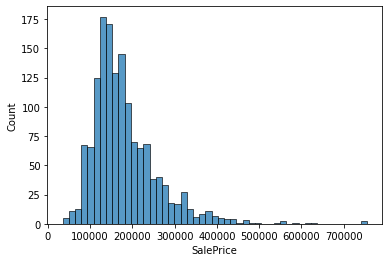

In [ ]:
import seaborn as sns
sns.histplot(train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

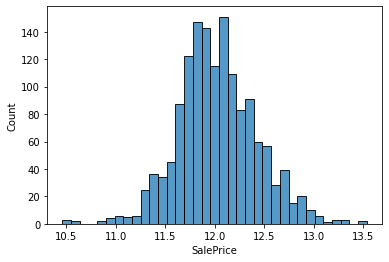

In [ ]:
import numpy as np

target = np.log(train['SalePrice'])

sns.histplot(target)

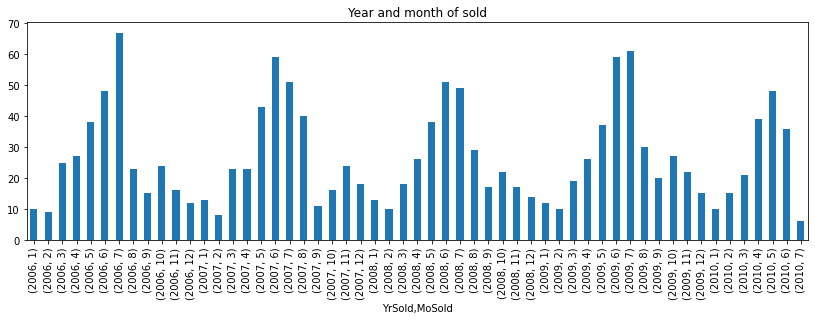

In [ ]:
#Year and Month Wise

import matplotlib.pyplot as plt
%matplotlib inline

train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar',figsize=(14,4))
plt.title("Year and month of sold")
plt.show()

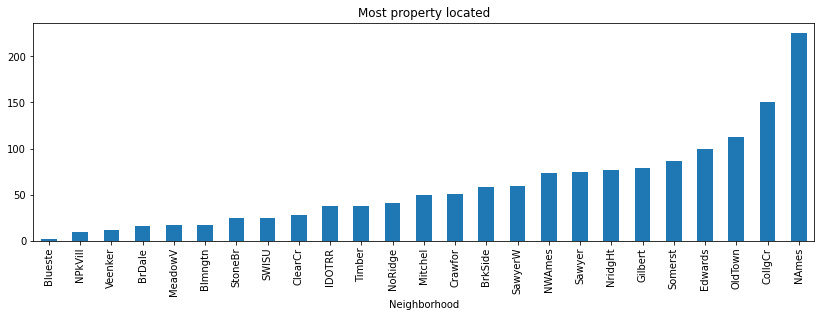

In [ ]:
#Location of the place 

train.groupby('Neighborhood').Id.count().\
  sort_values().\
  plot(kind='bar',figsize=(14,4))
plt.title("Most property located")
plt.show()

In [ ]:
#finding numerical features

numeric_data = train.select_dtypes(include = [np.number])


#catagorecal features

catagorical_data = train.select_dtypes(exclude = [np.number])
print('there are {0} numerical and {1} catagorical featueres'.\
      format(numeric_data.shape[1],catagorical_data.shape[1]))


there are 38 numerical and 43 catagorical featueres


<Axes: >

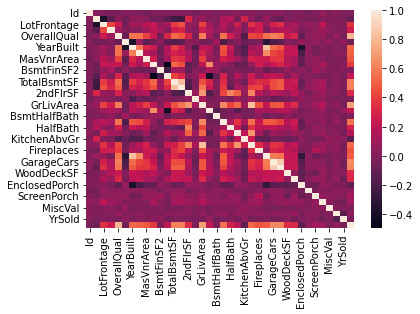

In [ ]:
#numeric_data corelation plot

corr = numeric_data.corr()

#heatmap
sns.heatmap(corr)


In [ ]:
train = train.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'SaleType',
       'SaleCondition'], axis=1)

In [ ]:
train.columns

Index(['LotArea', 'Street', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'CentralAir', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [ ]:
train.isnull().sum()

LotArea         0
Street          0
BldgType        0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
CentralAir      0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

In [ ]:
#converting numarical f to catagorical
train['MoSold'] = train.MoSold.apply(lambda x: str(x))
train['YrSold'] = train.YrSold.apply(lambda x: str(x))

In [ ]:
#After coverting finding numerical feature

numeric_data = train.select_dtypes(include = [np.number])


#catagorical feature

catagorical_data = train.select_dtypes(exclude = [np.number])
print('there are {0} numerical and {1} catagorical featueres'.\
      format(numeric_data.shape[1],catagorical_data.shape[1]))


there are 6 numerical and 5 catagorical featueres


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


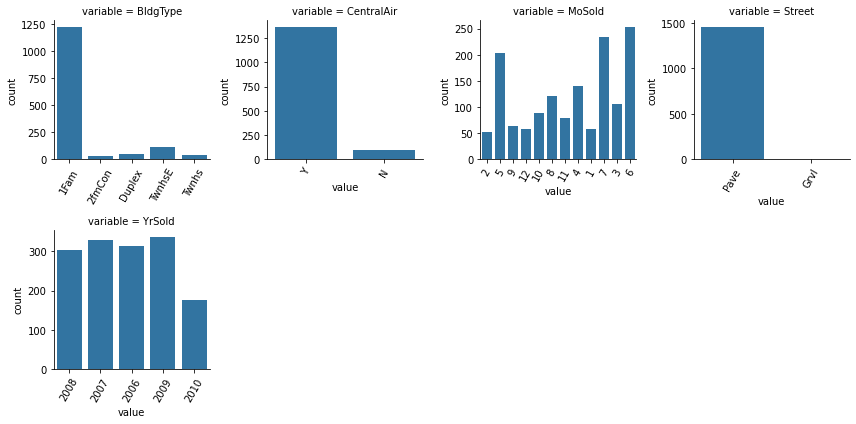

In [ ]:
f = pd.melt(train, value_vars=sorted(catagorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False,sharey=False)
plt.xticks(rotation ='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60)for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [ ]:
train.groupby('CentralAir').size().reset_index(name='count')

,CentralAir,count
0,N,95
1,Y,1365


In [ ]:
train.groupby('BldgType').size().reset_index(name='count')

,BldgType,count
0,1Fam,1220
1,2fmCon,31
2,Duplex,52
3,Twnhs,43
4,TwnhsE,114


In [ ]:
train.groupby('Street').size().reset_index(name='count')

,Street,count
0,Grvl,6
1,Pave,1454


In [ ]:
train["CentralAir"] = train["CentralAir"].astype('category')
train["BldgType"] = train["BldgType"].astype('category')
train["Street"] = train["Street"].astype('category')

In [ ]:
train["CentralAir"] = train["CentralAir"].cat.codes
train["BldgType"] = train["BldgType"].cat.codes
train["Street"] = train["Street"].cat.codes

In [ ]:
train.head()

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,MoSold,YrSold,SalePrice
0,8450,1,0,7,5,2003,2003,1,2,2008,208500
1,9600,1,0,6,8,1976,1976,1,5,2007,181500
2,11250,1,0,7,5,2001,2002,1,9,2008,223500
3,9550,1,0,7,5,1915,1970,1,2,2006,140000
4,14260,1,0,8,5,2000,2000,1,12,2008,250000


In [ ]:
numeric_data = train.select_dtypes(include = [np.number])

catagorical_data = train.select_dtypes(exclude = [np.number])
print('there are {0} numerical and {1} catagorical featueres'.\
      format(numeric_data.shape[1],catagorical_data.shape[1]))

there are 9 numerical and 2 catagorical featueres


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


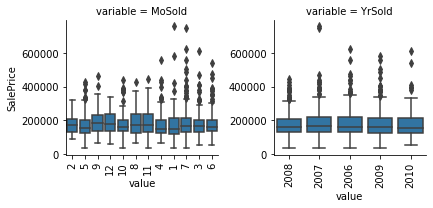

In [ ]:
#box plot

f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(catagorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.boxplot, 'value','SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90)for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


In [ ]:
train.SalePrice.value_counts()*100/train.shape[0]

140000    1.369863
135000    1.164384
155000    0.958904
145000    0.958904
190000    0.890411
            ...   
202665    0.068493
164900    0.068493
208300    0.068493
181500    0.068493
147500    0.068493
Name: SalePrice, Length: 663, dtype: float64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

features = train.drop(['SalePrice'], axis=1)
labels = train['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=15421)

# Over Sampling
over_sampler = RandomOverSampler(random_state=544315)
x_over_samp, y_over_samp = over_sampler.fit_resample(x_train, y_train)

print(f"Before sampling: {len([i for i in y_train if i==1])}, {len([i for i in y_train if i==0])}")
print(f"After sampling: {len([i for i in y_over_samp if i==1])}, {len([i for i in y_over_samp if i==0])}")

Before sampling: 0, 0
After sampling: 0, 0


In [ ]:
# Under Sampling
under_sampler = RandomUnderSampler(random_state=531212)
x_under_samp, y_under_samp = under_sampler.fit_resample(x_train, y_train)

print(f"Before sampling: {len([i for i in y_train if i==1])}, {len([i for i in y_train if i==0])}")
print(f"After sampling: {len([i for i in y_under_samp if i==1])}, {len([i for i in y_under_samp if i==0])}")

Before sampling: 0, 0
After sampling: 0, 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier() #(n_estimators=500)

model_dt.fit(x_train, y_train)
model_rf.fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
print ("DT: {}, \nRF: {}".format (accuracy_score(y_test, y_pred_dt)*100,\
                                  accuracy_score(y_test, y_pred_rf)*100))



DT: 1.36986301369863, 
RF: 1.7123287671232876


In [ ]:
from sklearn.linear_model import LinearRegression
linerR = LinearRegression()
linerR.fit(x_train, y_train)


LinearRegression()

In [ ]:
y = linerR.predict(x_test)
linerR.score(x_test,y_test)

0.6715572127633832

In [ ]:
import pickle
pickle.dump(model_rf,open('/content/drive/MyDrive/CI/Complete/HousePrice.pkl', 'wb'))